### Calculation of $n[r]$ for an ideal gas

$n[r]$ represents the average number of particles found at a distance $d$ where $r\leq d \leq r + \Delta r$ from a given particle $i$. For an ideal gas, the position of all particles is independent.


Write a MC code where $N=1000$ particoles are uniformly distributed inside a 2D box of size $L=10$. Compute all pair distances $R_{ij},\{i,1,N-1\},\{j,i+1,N\}$ and accumulate the value $r_{ij}$ (increment of 1 in the counts of both particles) at bin number $r_{ij}/\Delta r$.

All $N$ particoles are identical, so a common count is enough. Just accumulate 1 in both bins of particles $i$ and $j$ -> increment by 2.

Properly normalize the histogram dividing by $N$ x Nsamples

The pair distances $r_{ij}$ must be computed as the smallest distance between the images of particles $i$ and $j$.

The plot togheter the resulting histogram and the theoretical value the function $n(r)=2\pi r$.

In [7]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [8]:
N = 1000
L = 10

def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

Particles = np.zeros((N, 2))

for i in range(N):
    Particles[i][0] = random.random() * L
    Particles[i][1] = random.random() * L

# compute the distance between all particles
Distances = np.zeros((N, N))
for i in range(N):
    for j in range(i+1, N):
        Distances[i][j] = distance(Particles[i][0], Particles[i][1], Particles[j][0], Particles[j][1])
        Distances[j][i] = Distances[i][j]

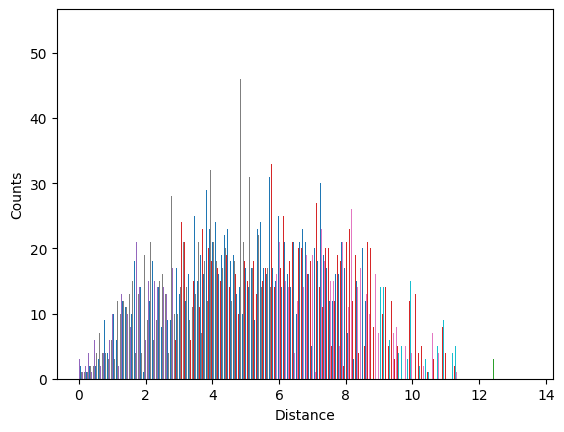

In [11]:
# compute the histogram
plt.hist(Distances, bins=100)
plt.xlabel(r'Distance')
plt.ylabel(r'Counts')
plt.show()